In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
import pickle
from pathlib import Path

# Path to your stats file
stats_path = 'imu_stats.pkl'  # Update if different

# Load a single .pkl file to inspect paths
sample_pkl = Path('/home/harshr/bags/').glob('*.pkl').__next__()  # Get the first .pkl file
with open(sample_pkl, 'rb') as f:
    data_sample = pickle.load(f)

# Inspect thermal and depth paths
print("Sample Thermal Paths:")
for path in data_sample.get('thermal_paths', [])[:5]:
    print(path, Path(path).exists())

print("\nSample Depth Paths:")
for path in data_sample.get('depth_paths', [])[:5]:
    print(path, Path(path).exists())

Sample Thermal Paths:
/home/harshr/bags/thermal_BL_2024-09-04_19-34-36_chunk0000/0.png True
/home/harshr/bags/thermal_BL_2024-09-04_19-34-36_chunk0000/1.png True
/home/harshr/bags/thermal_BL_2024-09-04_19-34-36_chunk0000/2.png True
/home/harshr/bags/thermal_BL_2024-09-04_19-34-36_chunk0000/3.png True
/home/harshr/bags/thermal_BL_2024-09-04_19-34-36_chunk0000/4.png True

Sample Depth Paths:
/home/harshr/bags/depth_BL_2024-09-04_19-34-36_chunk0000/0.png True
/home/harshr/bags/depth_BL_2024-09-04_19-34-36_chunk0000/1.png True
/home/harshr/bags/depth_BL_2024-09-04_19-34-36_chunk0000/2.png True
/home/harshr/bags/depth_BL_2024-09-04_19-34-36_chunk0000/3.png True
/home/harshr/bags/depth_BL_2024-09-04_19-34-36_chunk0000/4.png True


In [2]:
def load_pickle_data(pickle_file_path):
    """
    Loads data from a pickle file.
    
    Args:
        pickle_file_path (str): Path to the pickle file.
        
    Returns:
        dict: Dictionary containing the loaded data.
    """
    if not os.path.exists(pickle_file_path):
        raise FileNotFoundError(f"Pickle file not found at: {pickle_file_path}")
    
    with open(pickle_file_path, 'rb') as f:
        data = pickle.load(f)
    print(f"Pickle file '{pickle_file_path}' loaded successfully.")
    return data

In [8]:
pickle_file_path = '/mnt/sbackup/Server_3/harshr/burk_lake_additional/BL_2024-09-04_19-09-17_chunk0000.pkl'

data = load_pickle_data(pickle_file_path)

Pickle file '/mnt/sbackup/Server_3/harshr/burk_lake_additional/BL_2024-09-04_19-09-17_chunk0000.pkl' loaded successfully.


In [9]:
data.keys()

dict_keys(['thermal_paths', 'left_rgb_paths', 'right_rgb_paths', 'depth_paths', 'res_vel_omega_roll_slde_bump', 'triplets', 'cmd_vel_msg', 'odom_1sec_msg', 'odom', 'odom_pose', 'accel_msg', 'gyro_msg', 'time_stamp', 'roll_pitch_yaw', 'imu_accel_1sec', 'imu_gyro_1sec', 'imu_accel_1m', 'imu_gyro_1m', 'imu_accel_const', 'imu_gyro_const'])

In [11]:
thermal_path = data.get('depth_paths', [])
print(thermal_path)

['/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/0.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/1.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/2.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/3.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/4.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/5.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/6.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/7.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/8.npy', '/mnt/sbackup/Server_3/harshr/burk_lake_additional/depth_BL_2024-09-04_19-09-17_chunk0000/9.npy', '/mnt/sbackup/Serve

In [7]:
cmd_vel_msg = data.get('cmd_vel_msg', [])
odom_1sec_msg = data.get('odom_1sec_msg', [])
odom = data.get('odom', [])
odom_pose = data.get('odom_pose', [])
accel_msg = data.get('accel_msg', [])
gyro_msg = data.get('gyro_msg', [])
time_stamp = data.get('time_stamp', [])
roll_pitch_yaw = data.get('roll_pitch_yaw', [])
imu_accel_1sec = data.get('imu_accel_1sec', [])
imu_gyro_1sec = data.get('imu_gyro_1sec', [])
imu_accel_1m = data.get('imu_accel_1m', [])
imu_gyro_1m = data.get('imu_gyro_1m', [])
imu_accel_const = data.get('imu_accel_const', [])
imu_gyro_const = data.get('imu_gyro_const', [])

In [8]:
min_length = min(len(cmd_vel_msg), len(odom_1sec_msg), len(odom),
                    len(accel_msg), len(gyro_msg), len(time_stamp),
                    len(roll_pitch_yaw), len(odom_pose))
if min_length == 0:
    print("One or more data lists are empty. Please check your pickle file.")
    

In [19]:
cmd_vel_msg = cmd_vel_msg[:min_length]
odom_1sec_msg = odom_1sec_msg[:min_length]
odom = odom[:min_length]
odom_pose = odom_pose[:min_length]
accel_msg = accel_msg[:min_length]
gyro_msg = gyro_msg[:min_length]
time_stamp = time_stamp[:min_length]
roll_pitch_yaw = roll_pitch_yaw[:min_length]


In [26]:
print("cmd_vel_msg[510]:", cmd_vel_msg[577])
print("Last cmd_vel in cmd_vel_msg[510]:", cmd_vel_msg[577][-2:])

cmd_vel_msg[510]: [ 1.          0.          1.          0.          1.          0.
  1.          0.          1.         -0.13308172  1.         -0.14912768
  1.         -0.13308172  1.         -0.13308172  1.         -0.14912768
  1.         -0.14912768]
Last cmd_vel in cmd_vel_msg[510]: [ 1.         -0.14912768]


In [38]:
cmd_vel_msg = np.array(cmd_vel_msg)
cmd_vel_msg.shape

(578, 20)

In [30]:
def plot_cmd_vel(cmd_vel_msg, time_stamp):
    """
    Plots command velocities over time.

    Args:
        cmd_vel_msg (list): List of flattened cmd_vel arrays.
        time_stamp (list): Corresponding timestamps.
    """
    # Extract the most recent linear and angular velocities
    linear_x = [msg[-2] for msg in cmd_vel_msg]  # Last linear.x
    angular_z = [msg[-1] for msg in cmd_vel_msg]  # Last angular.z

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time_stamp, linear_x, label='Linear X Velocity', color='blue')
    plt.ylabel('Linear X (m/s)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(time_stamp, angular_z, label='Angular Z Velocity', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Z (rad/s)')
    plt.legend()
    plt.grid(True)

    plt.suptitle('Command Velocities Over Time')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

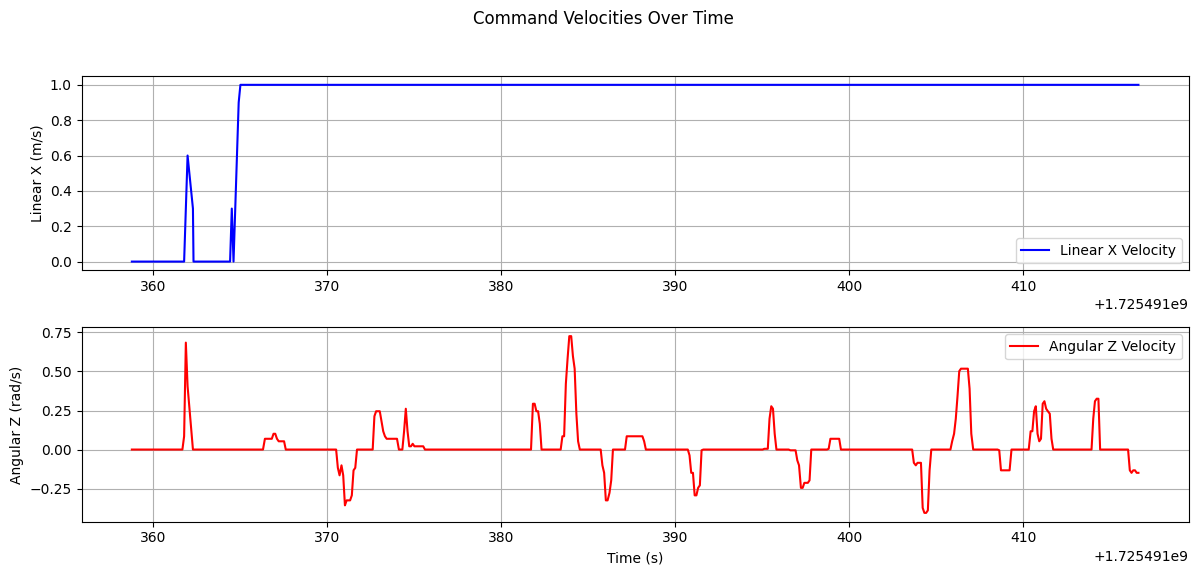

In [31]:
plot_cmd_vel(cmd_vel_msg, time_stamp)

In [12]:
def plot_odom_1sec(odom_1sec_msg, time_stamp):
    """
    Plots odometry velocities over time.
    
    Args:
        odom_1sec_msg (list): List of [linear.x, linear.y, angular.z] velocities.
        time_stamp (list): Corresponding timestamps.
    """
    linear_x = [msg[0] for msg in odom_1sec_msg]
    linear_y = [msg[1] for msg in odom_1sec_msg]
    angular_z = [msg[2] for msg in odom_1sec_msg]
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(time_stamp, linear_x, label='Linear X Velocity', color='blue')
    plt.ylabel('Linear X (m/s)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(time_stamp, linear_y, label='Linear Y Velocity', color='green')
    plt.ylabel('Linear Y (m/s)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(time_stamp, angular_z, label='Angular Z Velocity', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Z (rad/s)')
    plt.legend()
    plt.grid(True)
    
    plt.suptitle('Odometry Velocities Over Time (1 Sec)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

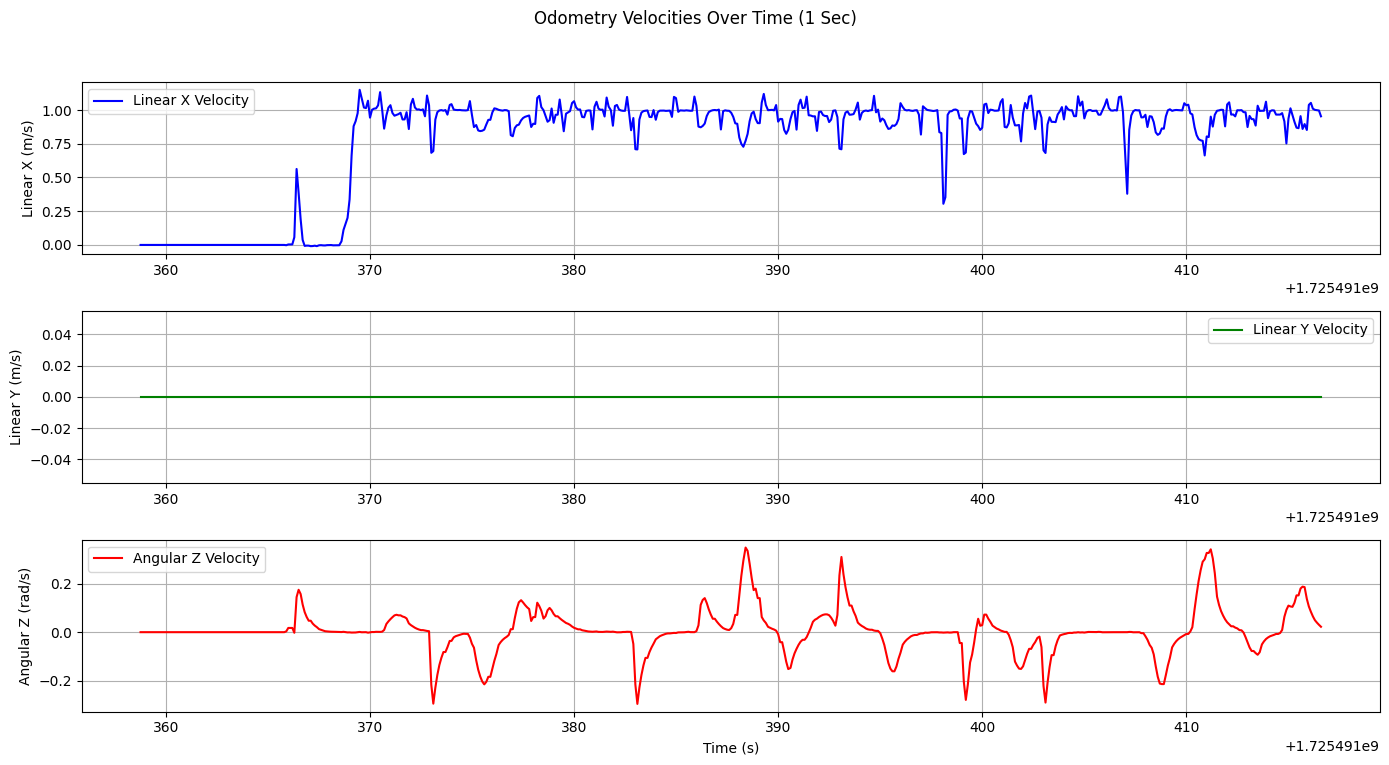

In [13]:
plot_odom_1sec(odom_1sec_msg, time_stamp)

In [16]:
def plot_accel(accel_msg, time_stamp):
    """
    Plots accelerometer data over time.
    
    Args:
        accel_msg (list): List of [ax, ay, az] accelerations.
        time_stamp (list): Corresponding timestamps.
    """
    ax = [msg[0] for msg in accel_msg]
    ay = [msg[1] for msg in accel_msg]
    az = [msg[2] for msg in accel_msg]
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(time_stamp, ax, label='Accel X', color='blue')
    plt.ylabel('Accel X (m/s²)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(time_stamp, ay, label='Accel Y', color='green')
    plt.ylabel('Accel Y (m/s²)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(time_stamp, az, label='Accel Z', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Accel Z (m/s²)')
    plt.legend()
    plt.grid(True)
    
    plt.suptitle('Accelerometer Data Over Time')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

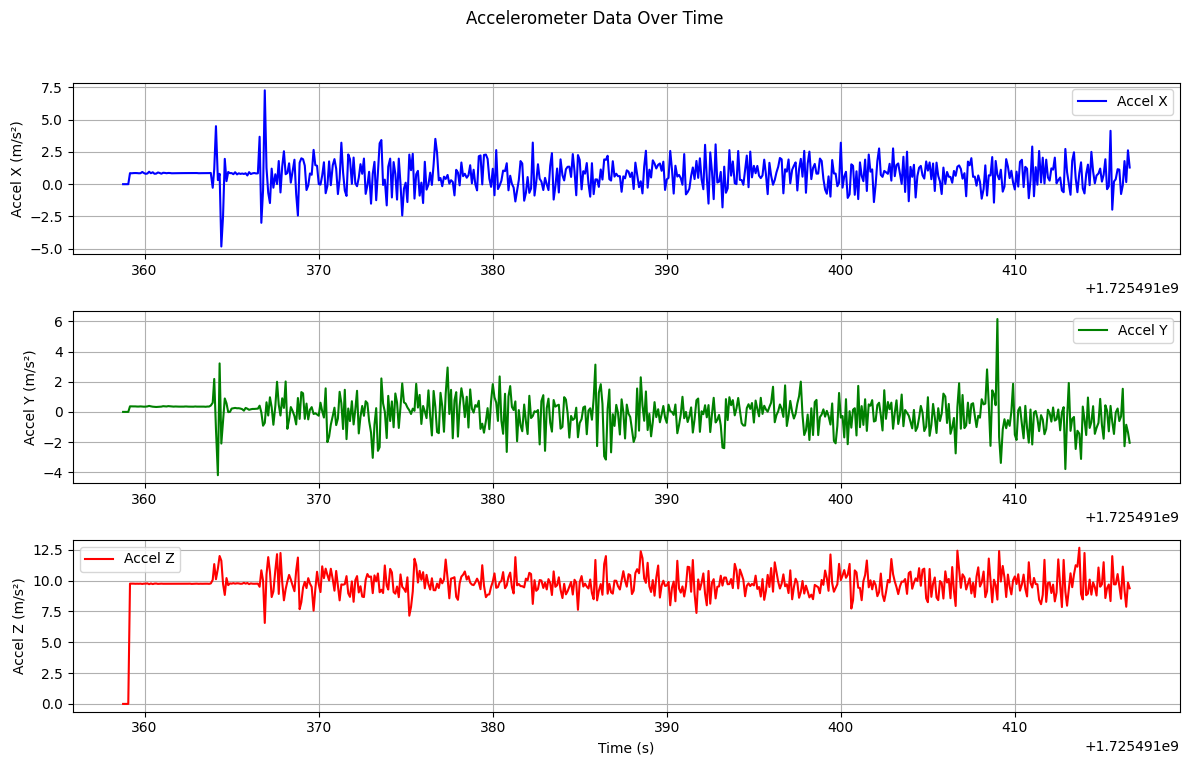

In [17]:
plot_accel(accel_msg, time_stamp)

In [18]:
def plot_gyro(gyro_msg, time_stamp):
    """
    Plots gyroscope data over time.
    
    Args:
        gyro_msg (list): List of [gx, gy, gz] angular velocities.
        time_stamp (list): Corresponding timestamps.
    """
    gx = [msg[0] for msg in gyro_msg]
    gy = [msg[1] for msg in gyro_msg]
    gz = [msg[2] for msg in gyro_msg]
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(time_stamp, gx, label='Gyro X', color='blue')
    plt.ylabel('Gyro X (rad/s)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(time_stamp, gy, label='Gyro Y', color='green')
    plt.ylabel('Gyro Y (rad/s)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(time_stamp, gz, label='Gyro Z', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Gyro Z (rad/s)')
    plt.legend()
    plt.grid(True)
    
    plt.suptitle('Gyroscope Data Over Time')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

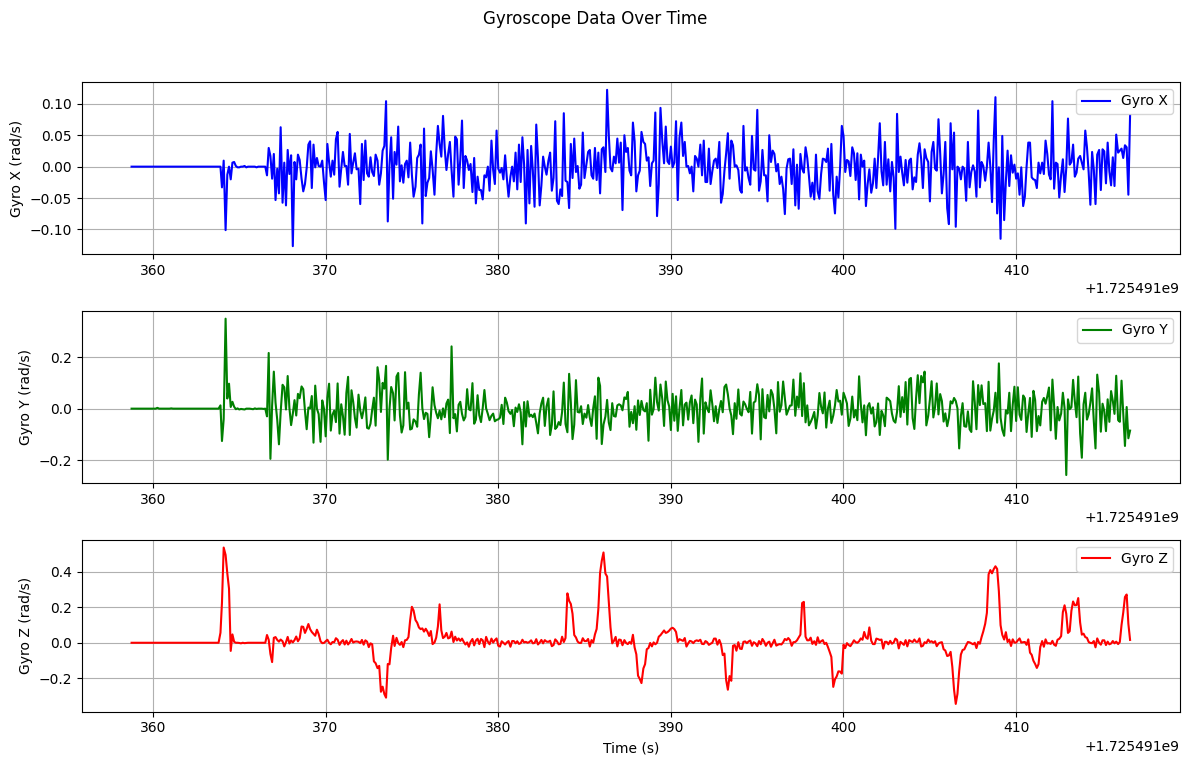

In [19]:
plot_gyro(gyro_msg, time_stamp)

In [20]:
def plot_orientation(roll_pitch_yaw, time_stamp):
    """
    Plots roll, pitch, and yaw angles over time.
    
    Args:
        roll_pitch_yaw (list): List of [roll, pitch, yaw] in radians.
        time_stamp (list): Corresponding timestamps.
    """
    roll = [msg[0] for msg in roll_pitch_yaw]
    pitch = [msg[1] for msg in roll_pitch_yaw]
    yaw = [msg[2] for msg in roll_pitch_yaw]
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(time_stamp, roll, label='Roll', color='blue')
    plt.ylabel('Roll (rad)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(time_stamp, pitch, label='Pitch', color='green')
    plt.ylabel('Pitch (rad)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(time_stamp, yaw, label='Yaw', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Yaw (rad)')
    plt.legend()
    plt.grid(True)
    
    plt.suptitle('Orientation (Roll, Pitch, Yaw) Over Time')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

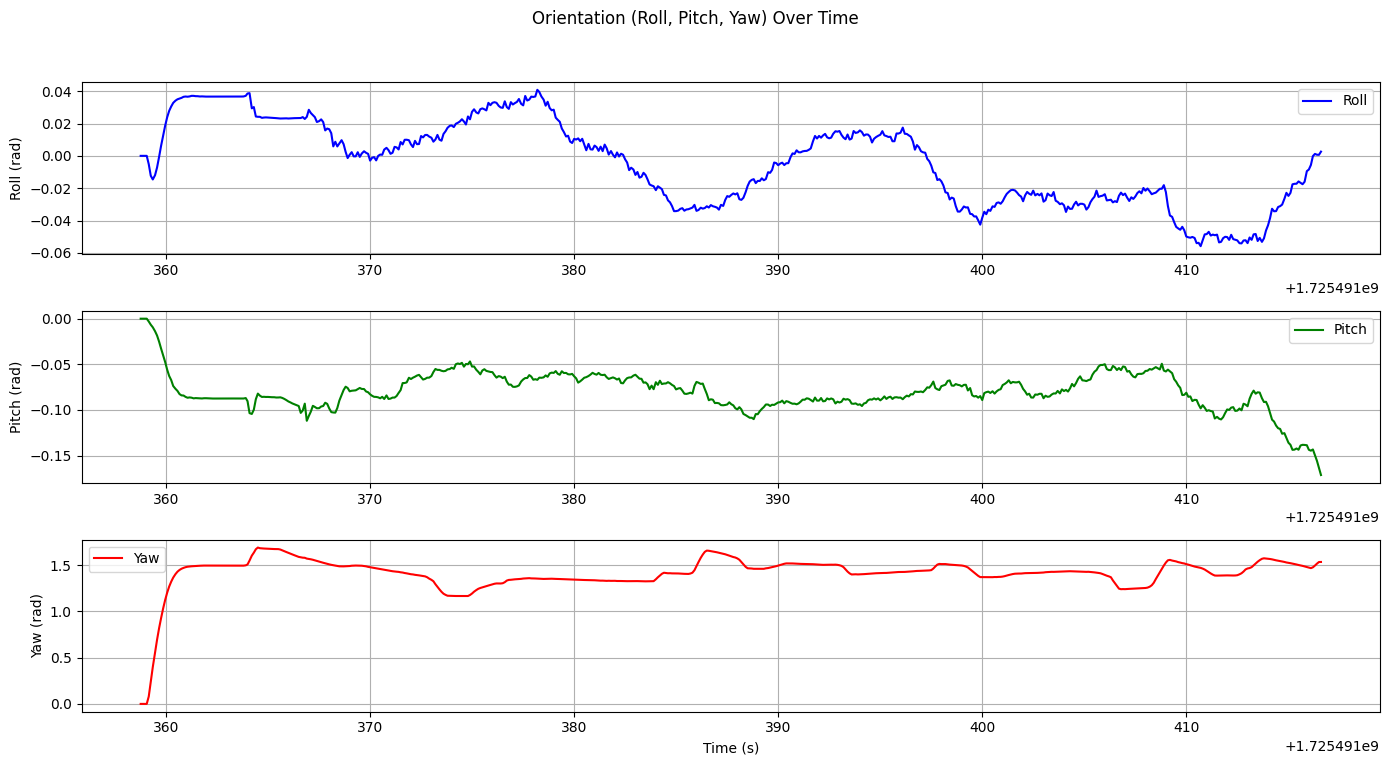

In [21]:
plot_orientation(roll_pitch_yaw, time_stamp)

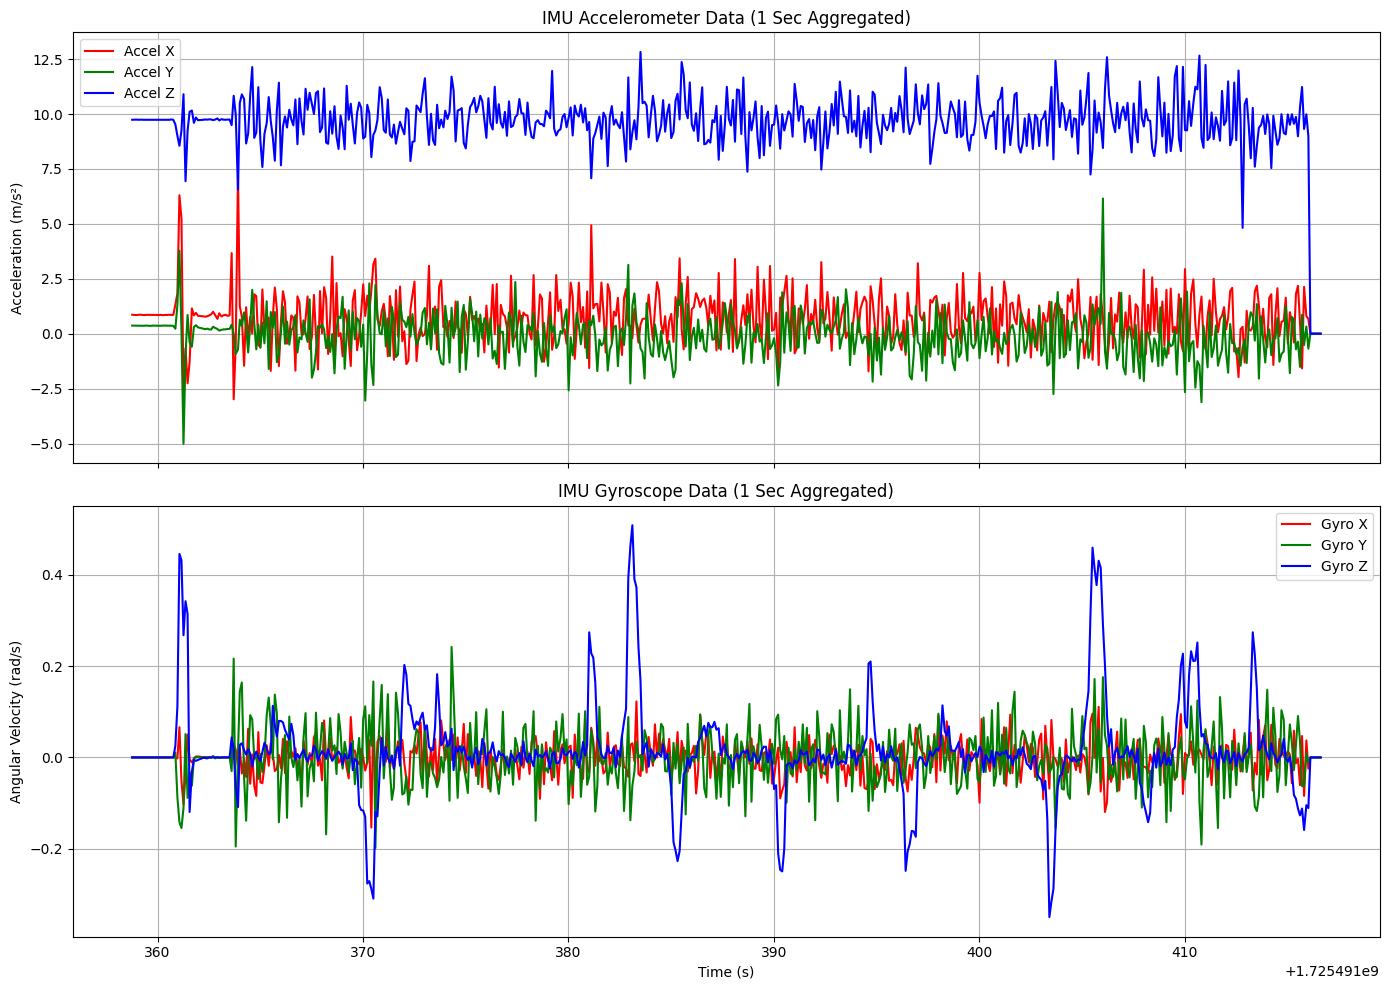

In [38]:
def plot_imu_1sec(imu_accel_1sec, imu_gyro_1sec, time_stamp):
    """
    Plots IMU data aggregated over 1 second intervals.

    Args:
        imu_accel_1sec (list): List of [accel_x, accel_y, accel_z] averaged over 1 sec.
        imu_gyro_1sec (list): List of [gyro_x, gyro_y, gyro_z] averaged over 1 sec.
        time_stamp (list): Corresponding timestamps.
    """
    accel_x = [msg[0] for msg in imu_accel_1sec]
    accel_y = [msg[1] for msg in imu_accel_1sec]
    accel_z = [msg[2] for msg in imu_accel_1sec]

    gyro_x = [msg[0] for msg in imu_gyro_1sec]
    gyro_y = [msg[1] for msg in imu_gyro_1sec]
    gyro_z = [msg[2] for msg in imu_gyro_1sec]

    fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Accelerometer 1 sec
    axs[0].plot(time_stamp, accel_x, label='Accel X', color='r')
    axs[0].plot(time_stamp, accel_y, label='Accel Y', color='g')
    axs[0].plot(time_stamp, accel_z, label='Accel Z', color='b')
    axs[0].set_ylabel('Acceleration (m/s²)')
    axs[0].set_title('IMU Accelerometer Data (1 Sec Aggregated)')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope 1 sec
    axs[1].plot(time_stamp, gyro_x, label='Gyro X', color='r')
    axs[1].plot(time_stamp, gyro_y, label='Gyro Y', color='g')
    axs[1].plot(time_stamp, gyro_z, label='Gyro Z', color='b')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angular Velocity (rad/s)')
    axs[1].set_title('IMU Gyroscope Data (1 Sec Aggregated)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_imu_1sec(
    imu_accel_1sec[:min_length],
    imu_gyro_1sec[:min_length],
    time_stamp[:min_length]
)


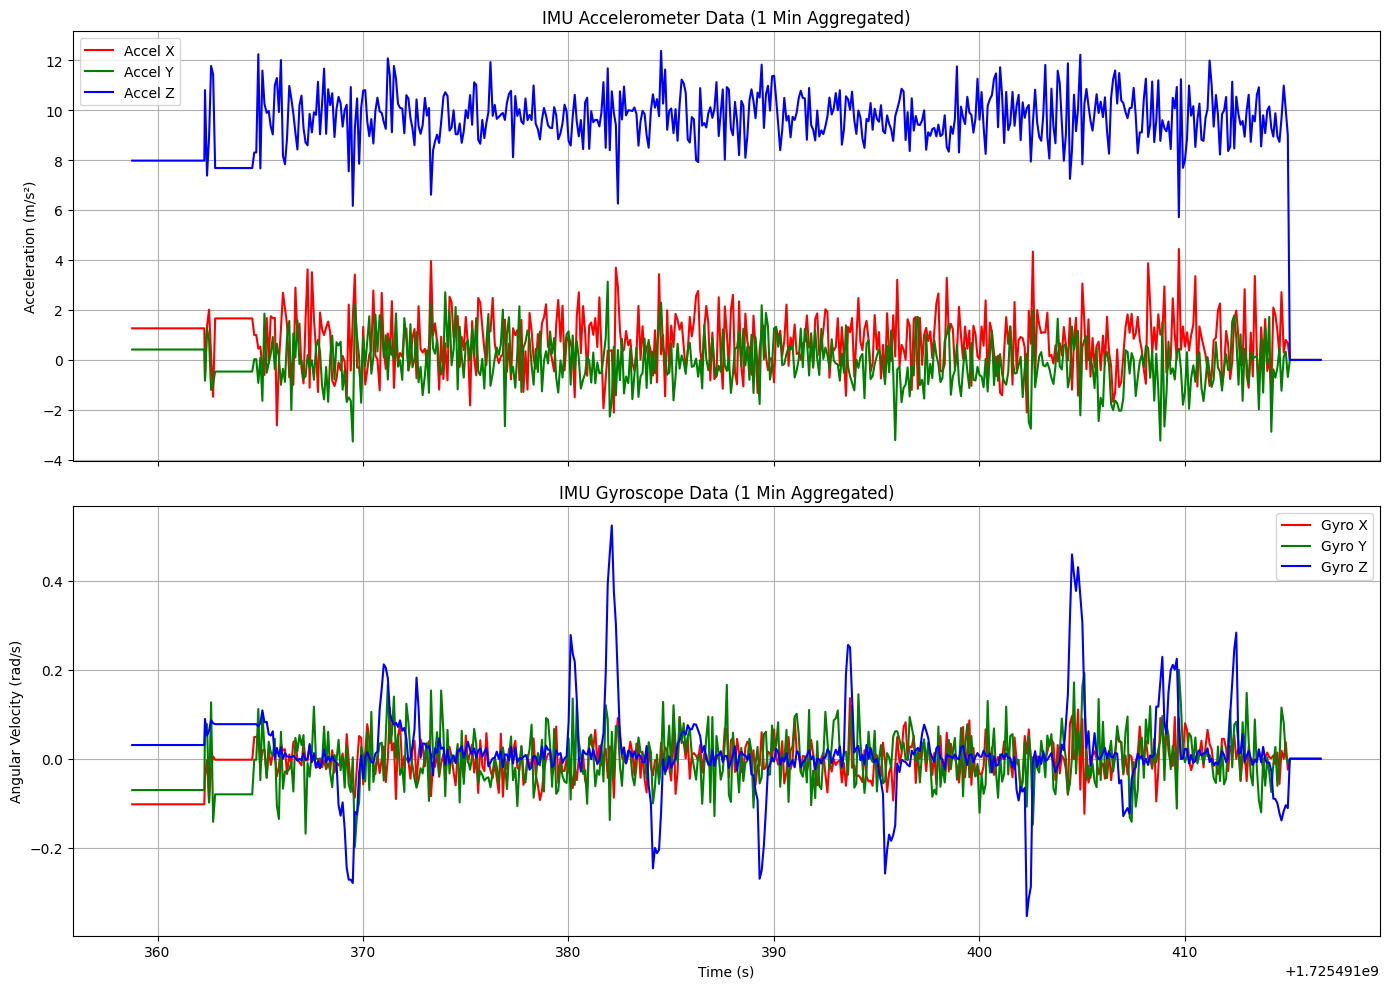

In [40]:
def plot_imu_1m(imu_accel_1m, imu_gyro_1m, time_stamp):
    """
    Plots IMU data aggregated over 1 minute intervals.

    Args:
        imu_accel_1m (list): List of [accel_x, accel_y, accel_z] averaged over 1 min.
        imu_gyro_1m (list): List of [gyro_x, gyro_y, gyro_z] averaged over 1 min.
        time_stamp (list): Corresponding timestamps.
    """
    accel_x = [msg[0] for msg in imu_accel_1m]
    accel_y = [msg[1] for msg in imu_accel_1m]
    accel_z = [msg[2] for msg in imu_accel_1m]

    gyro_x = [msg[0] for msg in imu_gyro_1m]
    gyro_y = [msg[1] for msg in imu_gyro_1m]
    gyro_z = [msg[2] for msg in imu_gyro_1m]

    fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Accelerometer 1 min
    axs[0].plot(time_stamp, accel_x, label='Accel X', color='r')
    axs[0].plot(time_stamp, accel_y, label='Accel Y', color='g')
    axs[0].plot(time_stamp, accel_z, label='Accel Z', color='b')
    axs[0].set_ylabel('Acceleration (m/s²)')
    axs[0].set_title('IMU Accelerometer Data (1 Min Aggregated)')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope 1 min
    axs[1].plot(time_stamp, gyro_x, label='Gyro X', color='r')
    axs[1].plot(time_stamp, gyro_y, label='Gyro Y', color='g')
    axs[1].plot(time_stamp, gyro_z, label='Gyro Z', color='b')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angular Velocity (rad/s)')
    axs[1].set_title('IMU Gyroscope Data (1 Min Aggregated)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_imu_1m(
    imu_accel_1m[:min_length],
    imu_gyro_1m[:min_length],
    time_stamp[:min_length]
)


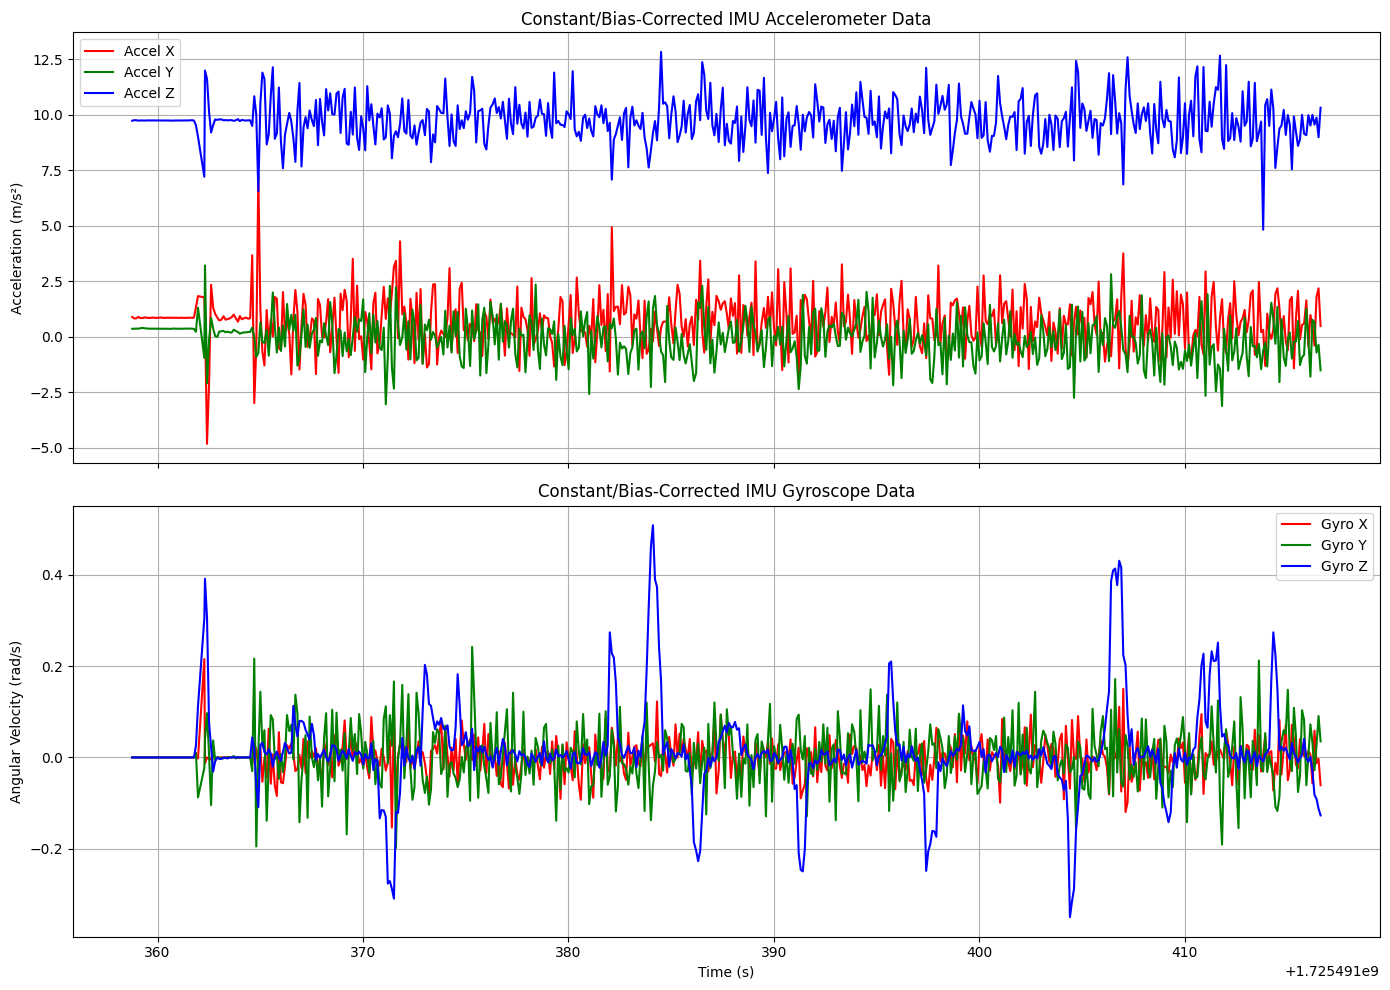

In [41]:
def plot_imu_constant(imu_accel_const, imu_gyro_const, time_stamp):
    """
    Plots constant or bias-corrected IMU data over time.

    Args:
        imu_accel_const (list): List of [accel_x, accel_y, accel_z] constant data.
        imu_gyro_const (list): List of [gyro_x, gyro_y, gyro_z] constant data.
        time_stamp (list): Corresponding timestamps.
    """
    accel_x = [msg[0] for msg in imu_accel_const]
    accel_y = [msg[1] for msg in imu_accel_const]
    accel_z = [msg[2] for msg in imu_accel_const]

    gyro_x = [msg[0] for msg in imu_gyro_const]
    gyro_y = [msg[1] for msg in imu_gyro_const]
    gyro_z = [msg[2] for msg in imu_gyro_const]

    fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Accelerometer Constant Data
    axs[0].plot(time_stamp, accel_x, label='Accel X', color='r')
    axs[0].plot(time_stamp, accel_y, label='Accel Y', color='g')
    axs[0].plot(time_stamp, accel_z, label='Accel Z', color='b')
    axs[0].set_ylabel('Acceleration (m/s²)')
    axs[0].set_title('Constant/Bias-Corrected IMU Accelerometer Data')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope Constant Data
    axs[1].plot(time_stamp, gyro_x, label='Gyro X', color='r')
    axs[1].plot(time_stamp, gyro_y, label='Gyro Y', color='g')
    axs[1].plot(time_stamp, gyro_z, label='Gyro Z', color='b')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angular Velocity (rad/s)')
    axs[1].set_title('Constant/Bias-Corrected IMU Gyroscope Data')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_imu_constant(
    imu_accel_const[:min_length],
    imu_gyro_const[:min_length],
    time_stamp[:min_length]
)


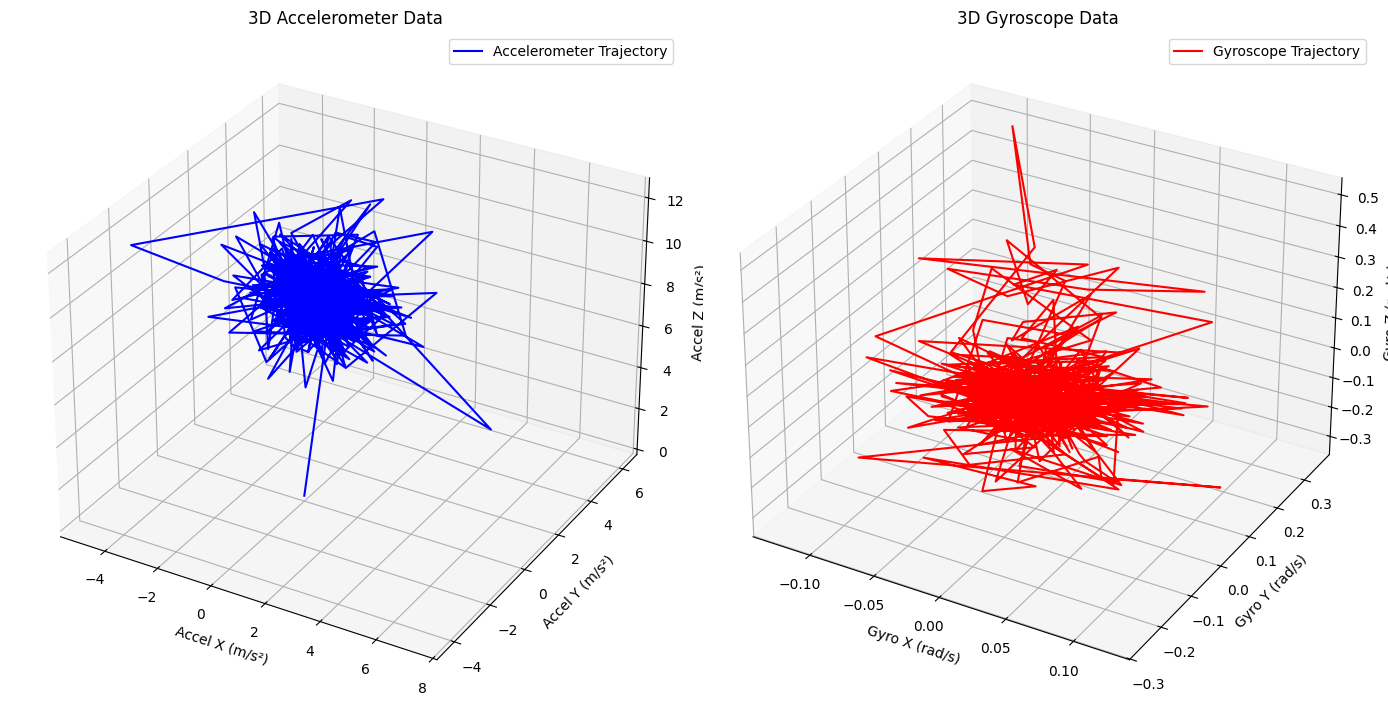

In [44]:
from mpl_toolkits.mplot3d import Axes3D

def plot_imu_3d(accel_msg, gyro_msg):
    """
    Creates a 3D plot of accelerometer and gyroscope data.

    Args:
        accel_msg (list): List of [accel_x, accel_y, accel_z] readings.
        gyro_msg (list): List of [gyro_x, gyro_y, gyro_z] readings.
    """
    fig = plt.figure(figsize=(14, 7))

    # 3D Accelerometer
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    accel_x = [msg[0] for msg in accel_msg]
    accel_y = [msg[1] for msg in accel_msg]
    accel_z = [msg[2] for msg in accel_msg]
    ax1.plot(accel_x, accel_y, accel_z, label='Accelerometer Trajectory', color='b')
    ax1.set_title('3D Accelerometer Data')
    ax1.set_xlabel('Accel X (m/s²)')
    ax1.set_ylabel('Accel Y (m/s²)')
    ax1.set_zlabel('Accel Z (m/s²)')
    ax1.legend()

    # 3D Gyroscope
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    gyro_x = [msg[0] for msg in gyro_msg]
    gyro_y = [msg[1] for msg in gyro_msg]
    gyro_z = [msg[2] for msg in gyro_msg]
    ax2.plot(gyro_x, gyro_y, gyro_z, label='Gyroscope Trajectory', color='r')
    ax2.set_title('3D Gyroscope Data')
    ax2.set_xlabel('Gyro X (rad/s)')
    ax2.set_ylabel('Gyro Y (rad/s)')
    ax2.set_zlabel('Gyro Z (rad/s)')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_imu_3d(accel_msg[:min_length], gyro_msg[:min_length])


In [27]:
import math

def reconstruct_trajectory_with_yaw(odom_1sec_msg, time_stamp, roll_pitch_yaw):
    """
    Reconstructs the robot's trajectory by integrating velocities over time, considering yaw orientation.
    
    Args:
        odom_1sec_msg (list): List of [linear.x, linear.y, angular.z] velocities.
        time_stamp (list): Corresponding timestamps.
        roll_pitch_yaw (list): List of [roll, pitch, yaw] angles in radians.
    
    Returns:
        tuple: Lists of x positions and y positions.
    """
    x_positions = [0.0]
    y_positions = [0.0]
    current_yaw = 0.0  # Initialize yaw

    for i in range(1, len(odom_1sec_msg)):
        dt = time_stamp[i] - time_stamp[i-1]
        if dt <= 0:
            dt = 1e-3  # Avoid division by zero or negative time
        
        # Update current yaw based on roll_pitch_yaw
        current_yaw = roll_pitch_yaw[i][2]  # Assuming [roll, pitch, yaw]
        
        # Extract local velocities
        linear_x = odom_1sec_msg[i][0]
        linear_y = odom_1sec_msg[i][1]
        
        # Transform local velocities to world frame using yaw
        world_vx = linear_x * math.cos(current_yaw) - linear_y * math.sin(current_yaw)
        world_vy = linear_x * math.sin(current_yaw) + linear_y * math.cos(current_yaw)
        
        # Update positions
        x_new = x_positions[-1] + world_vx * dt
        y_new = y_positions[-1] + world_vy * dt
        
        x_positions.append(x_new)
        y_positions.append(y_new)
    
    return x_positions, y_positions

def plot_reconstructed_trajectory_with_yaw(x, y, title='Reconstructed Robot Trajectory with Yaw'):
    """
    Plots the reconstructed robot's trajectory with yaw consideration.
    
    Args:
        x (list): List of x positions.
        y (list): List of y positions.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, marker='o', linestyle='-', color='purple')
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.title(title)
    plt.legend(['Trajectory'])
    plt.grid(True)
    plt.axis('equal')
    plt.show()



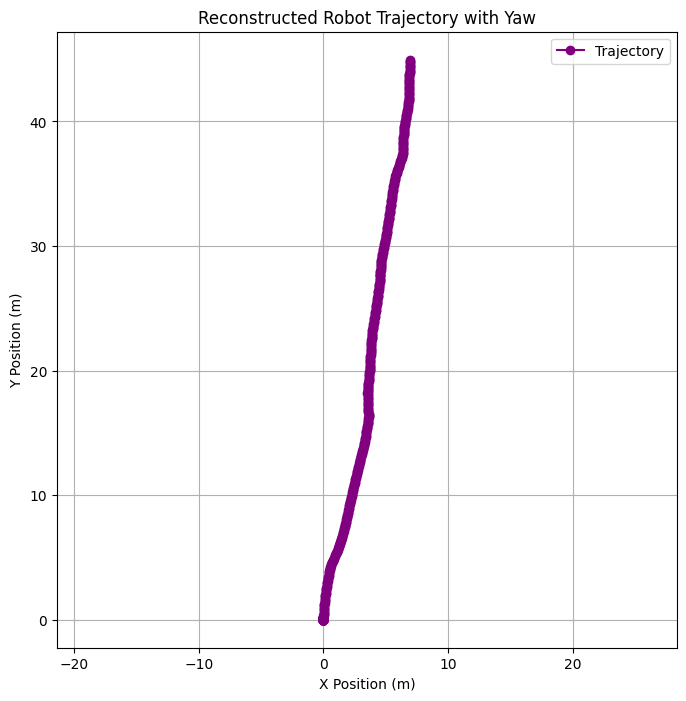

In [28]:
x_yaw, y_yaw = reconstruct_trajectory_with_yaw(odom_1sec_msg, time_stamp, roll_pitch_yaw)
plot_reconstructed_trajectory_with_yaw(x_yaw, y_yaw, title='Reconstructed Robot Trajectory with Yaw')    

In [29]:
def plot_trajectory(odom_pose, title='Robot Trajectory'):
    """
    Plots the robot's trajectory based on saved odom poses.
    
    Args:
        odom_pose (list): List of (x, y) tuples.
        title (str): Title of the plot.
    """
    x = [pose[0] for pose in odom_pose]
    y = [pose[1] for pose in odom_pose]
    
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, marker='o', linestyle='-', color='purple')
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.title(title)
    plt.legend(['Trajectory'])
    plt.grid(True)
    plt.axis('equal')
    plt.show()

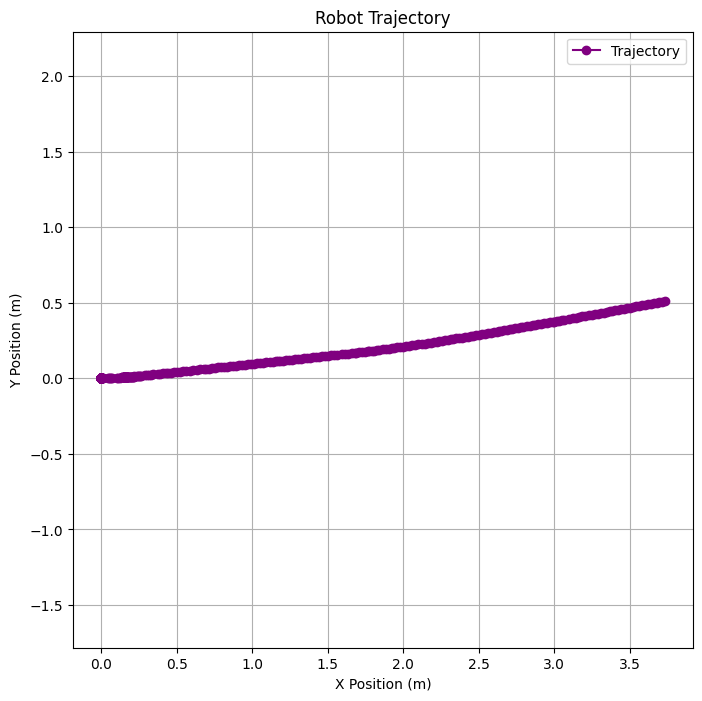

In [34]:
plot_trajectory(odom_pose, title='Robot Trajectory')